# 📊 Project Overview: Predictive Modeling with Random Forest and Support Vector Regression

## 📄 Objective
This project aims to develop predictive models using Random Forest and Support Vector Regression (SVR) to analyze a dataset related to ZIP codes and their associated values.

## 🗂️ Dataset
- **Source**: `qs.census2007zipcode.txt`
- **Size**: Sample of 5000 rows
- **Key Variables**:
  - `VALUE`: Target variable for prediction
  - Other relevant features that influence `VALUE`

## 🔍 Data Exploration
- **Initial Analysis**:
  - Displayed the first few rows, dataset information, and descriptive statistics.
  - Checked for missing values and duplicate rows.
  
- **Visualizations**:
  - Histogram of `VALUE` to understand its distribution.
  - Correlation matrix to identify relationships.
  - Scatter plot comparing `YEAR` and `VALUE`.

## 🔧 Data Preprocessing
- **Missing Values**:
  - Dropped columns with over 60% missing values.
  - Filled remaining missing values with mean (numerical) and mode (categorical).
  
- **Feature Selection**:
  - Dropped unnecessary columns and converted data types appropriately.
  
- **Encoding**:
  - One-hot encoding for categorical variables.
  
- **Data Splitting**:
  - Split dataset into training and testing sets (70/30).

## ⚙️ Model Development
### 1. Random Forest Regressor
- **Training**: Model trained on the training dataset.
- **Predictions**: Generated predictions on the testing dataset.

### 2. Support Vector Regressor
- **Hyperparameter Tuning**: Utilized GridSearchCV to find optimal hyperparameters.
- **Training and Predictions**: Model trained and predictions generated.

## 💾 Results
- **Predictions Saved**: Results saved to `predictions.csv`.
- **Evaluation Metrics**:
  - Mean Squared Error (MSE) and R² Score calculated for both models.
  
## 📈 Visualizations of Results
- **Residual Plots**: Analyzed residuals for both models.
- **Actual vs. Predicted Plots**: Compared actual and predicted values for insights into model performance.

## 📁 Conclusion
- The project successfully demonstrated the implementation of Random Forest and SVR for predictive modeling, providing insights into the dataset.

---

# 📚 Step 1: Importing Libraries
In this step, we import the necessary libraries for data manipulation, visualization, and machine learning.

## 🛠️ Libraries Used:
- **NumPy**: For numerical operations and array handling.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For data visualization.
- **Seaborn**: For enhanced visualization capabilities.
- **Scikit-learn**: For implementing machine learning algorithms.

In [16]:
# Importing necessary libraries

In [17]:
import pandas as pd  # Library for data manipulation and analysis

In [18]:
import numpy as np  # Library for numerical operations

In [19]:
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor model

In [20]:
from sklearn.svm import SVR  # Support Vector Regressor model

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV  # Functions for splitting data and hyperparameter tuning


In [22]:
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for evaluating model performance


In [23]:
from sklearn.preprocessing import StandardScaler  # Standardization of features

In [24]:
import warnings  # Library to manage warnings

In [25]:
import matplotlib.pyplot as plt  # Library for plotting

In [26]:
import seaborn as sns  # Library for statistical data visualization

In [27]:
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

---

---

# 📂 Step 2: Loading the Dataset
This step involves loading the dataset into a Pandas DataFrame for further analysis.

## 📊 Actions:
- **Read CSV**: The dataset is read from the specified file path using `pd.read_csv()`.
- **Data Preview**: Display the first few rows of the DataFrame to understand its structure and contents.

In [28]:
# Load the dataset (using a small sample for faster execution)

In [29]:
data_path = "/content/qs.census2007zipcode.txt"  # File path for the dataset

In [30]:
dataset = pd.read_csv(data_path, sep='\t').sample(5000, random_state=42)  # Sample of 5000 rows for faster processing


# 🔍 Step 3: Data Exploration
Data exploration helps us understand the dataset's characteristics and identify any issues.

## 🔑 Activities:
- **Information Summary**: Use `info()` to display the data types and non-null counts of each column.
- **Descriptive Statistics**: Utilize `describe()` to view summary statistics.
- **Missing Values**: Check for missing values and duplicate rows.

In [31]:
# Display the first few rows and basic information

In [32]:
print("First few rows of the dataset:")  # Output statement
print(dataset.head())  # Show the first 5 rows of the dataset

First few rows of the dataset:
      SOURCE_DESC         SECTOR_DESC             GROUP_DESC  \
25651      CENSUS  ANIMALS & PRODUCTS            AQUACULTURE   
5405       CENSUS           ECONOMICS  FARMS & LAND & ASSETS   
4034       CENSUS        DEMOGRAPHICS              OPERATORS   
21857      CENSUS               CROPS            FIELD CROPS   
27040      CENSUS           ECONOMICS                 INCOME   

             COMMODITY_DESC                               CLASS_DESC  \
25651    AQUACULTURE TOTALS                              ALL CLASSES   
5405                AG LAND  PASTURELAND, (EXCL CROPLAND & WOODLAND)   
4034   OPERATORS, PRINCIPAL                              ALL CLASSES   
21857         HAY & HAYLAGE                              ALL CLASSES   
27040         GOVT PROGRAMS                                  FEDERAL   

            PRODN_PRACTICE_DESC         UTIL_PRACTICE_DESC  \
25651  ALL PRODUCTION PRACTICES  ALL UTILIZATION PRACTICES   
5405   ALL PRODUCTION PRACT

In [33]:
print("\nDataset Information:")  # Output statement
print(dataset.info())  # Display summary information about the dataset


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 25651 to 6111
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SOURCE_DESC            5000 non-null   object 
 1   SECTOR_DESC            5000 non-null   object 
 2   GROUP_DESC             5000 non-null   object 
 3   COMMODITY_DESC         5000 non-null   object 
 4   CLASS_DESC             5000 non-null   object 
 5   PRODN_PRACTICE_DESC    5000 non-null   object 
 6   UTIL_PRACTICE_DESC     5000 non-null   object 
 7   STATISTICCAT_DESC      5000 non-null   object 
 8   UNIT_DESC              5000 non-null   object 
 9   SHORT_DESC             5000 non-null   object 
 10  DOMAIN_DESC            5000 non-null   object 
 11  DOMAINCAT_DESC         5000 non-null   object 
 12  AGG_LEVEL_DESC         5000 non-null   object 
 13  STATE_ANSI             5000 non-null   float64
 14  STATE_FIPS_CODE        5000 non-nul

In [34]:
print("\nDescriptive Statistics:")  # Output statement
print(dataset.describe())  # Display descriptive statistics for numerical columns


Descriptive Statistics:
       STATE_ANSI  STATE_FIPS_CODE  ASD_CODE  ASD_DESC  COUNTY_ANSI  \
count      5000.0           5000.0       0.0       0.0          0.0   
mean          1.0              1.0       NaN       NaN          NaN   
std           0.0              0.0       NaN       NaN          NaN   
min           1.0              1.0       NaN       NaN          NaN   
25%           1.0              1.0       NaN       NaN          NaN   
50%           1.0              1.0       NaN       NaN          NaN   
75%           1.0              1.0       NaN       NaN          NaN   
max           1.0              1.0       NaN       NaN          NaN   

       COUNTY_CODE  COUNTY_NAME  REGION_DESC         ZIP_5  WATERSHED_CODE  \
count          0.0          0.0          0.0   5000.000000          5000.0   
mean           NaN          NaN          NaN  35793.992600             0.0   
std            NaN          NaN          NaN    439.874995             0.0   
min            NaN     

In [35]:
print("\nMissing Values:")  # Output statement
print(dataset.isnull().sum())  # Display the count of missing values for each column


Missing Values:
SOURCE_DESC                 0
SECTOR_DESC                 0
GROUP_DESC                  0
COMMODITY_DESC              0
CLASS_DESC                  0
PRODN_PRACTICE_DESC         0
UTIL_PRACTICE_DESC          0
STATISTICCAT_DESC           0
UNIT_DESC                   0
SHORT_DESC                  0
DOMAIN_DESC                 0
DOMAINCAT_DESC              0
AGG_LEVEL_DESC              0
STATE_ANSI                  0
STATE_FIPS_CODE             0
STATE_ALPHA                 0
STATE_NAME                  0
ASD_CODE                 5000
ASD_DESC                 5000
COUNTY_ANSI              5000
COUNTY_CODE              5000
COUNTY_NAME              5000
REGION_DESC              5000
ZIP_5                       0
WATERSHED_CODE              0
WATERSHED_DESC           5000
CONGR_DISTRICT_CODE      5000
COUNTRY_CODE                0
COUNTRY_NAME                0
LOCATION_DESC               0
YEAR                        0
FREQ_DESC                   0
BEGIN_CODE             

In [36]:
print("\nDuplicate Rows:")  # Output statement
print(dataset.duplicated().sum())  # Count the number of duplicate rows


Duplicate Rows:
0


---

---

# 📊 Step 4: Data Visualization
Visualizations help to identify patterns and relationships within the data.

## 📈 Types of Visualizations:
- **Histogram**: Displays the distribution of the target variable (`VALUE`).
- **Correlation Matrix**: Visualizes correlations between features.
- **Scatter Plot**: Compares `YEAR` against `VALUE` to observe trends.

In [37]:
# Visualizing the dataset


In [38]:
# Histogram of 'VALUE'

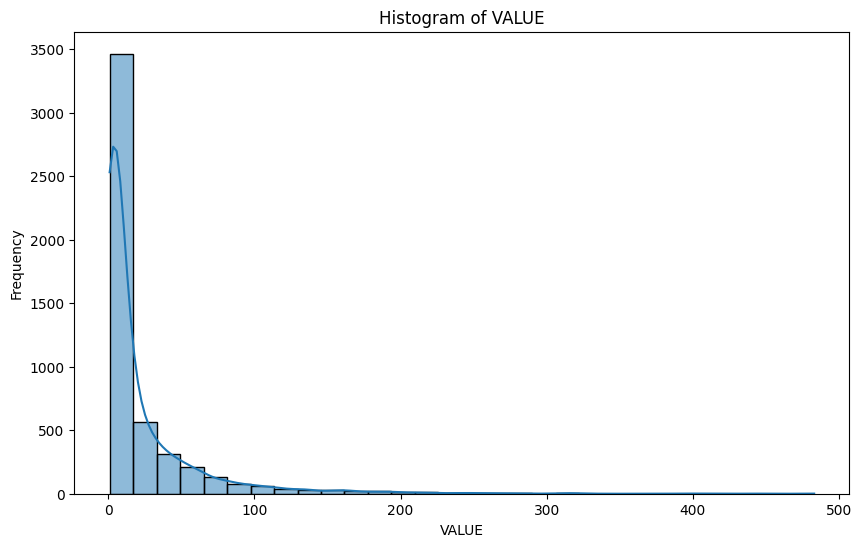

In [39]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(dataset['VALUE'], bins=30, kde=True)  # Histogram with a kernel density estimate
plt.title('Histogram of VALUE')  # Title of the histogram
plt.xlabel('VALUE')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the plot

In [40]:
# Correlation matrix

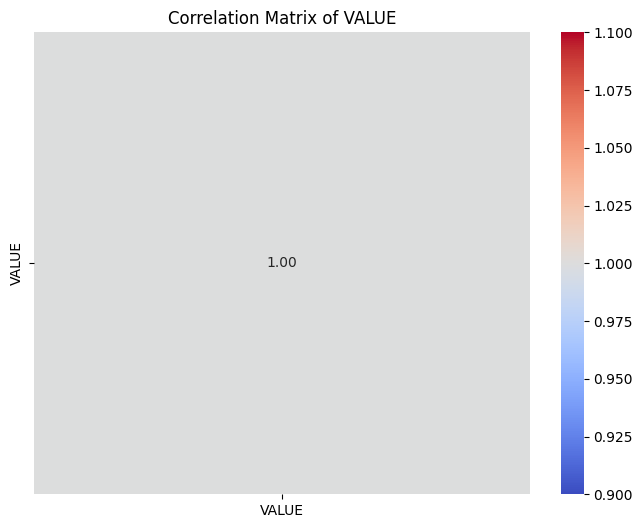

In [41]:
plt.figure(figsize=(8, 6))  # Set figure size
correlation_matrix = dataset[['VALUE']].corr()  # Calculate the correlation matrix for VALUE
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Heatmap for correlation matrix
plt.title('Correlation Matrix of VALUE')  # Title of the heatmap
plt.show()  # Display the plot

In [42]:
# Scatter plot (comparing 'YEAR' with 'VALUE')

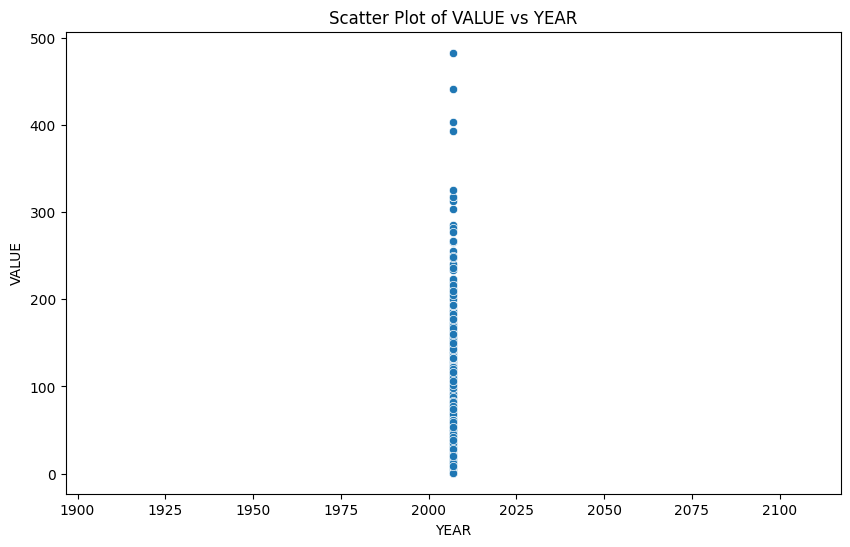

In [43]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(data=dataset, x='YEAR', y='VALUE')  # Scatter plot of 'VALUE' against 'YEAR'
plt.title('Scatter Plot of VALUE vs YEAR')  # Title of the scatter plot
plt.xlabel('YEAR')  # X-axis label
plt.ylabel('VALUE')  # Y-axis label
plt.show()  # Display the plot

---

---

# ⚙️ Step 5: Data Preprocessing
Data preprocessing ensures that the dataset is ready for modeling.

## 🔄 Key Actions:
- **Handling Missing Values**: Drop columns with excessive missing data and fill remaining gaps.
- **Feature Selection**: Remove unnecessary features and adjust data types.
- **Encoding**: Apply one-hot encoding for categorical features.
- **Data Splitting**: Divide the dataset into training and testing sets (70%/30%).

In [44]:
# Handling missing values (drop columns with a high percentage of missing values)

In [45]:
threshold = 0.6  # Set threshold to drop columns with more than 60% missing values

In [46]:
dataset = dataset.dropna(thresh=int((1 - threshold) * dataset.shape[0]), axis=1)  # Drop columns with missing values


In [47]:
# Fill remaining missing values with mean for numerical columns and mode for categorical columns

In [48]:
for column in dataset.columns:  # Loop through each column in the dataset
    if dataset[column].dtype == 'object':  # Check if the column is categorical
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)  # Fill missing values with mode
    else:  # If the column is numerical
        dataset[column].fillna(dataset[column].mean(), inplace=True)  # Fill missing values with mean

In [49]:
# Drop unnecessary columns that do not contribute to prediction (like identifiers)

In [50]:
dataset = dataset.drop(columns=['ASD_CODE', 'ASD_DESC', 'COUNTY_ANSI', 'COUNTY_CODE',
                                'COUNTY_NAME', 'REGION_DESC', 'WATERSHED_DESC',
                                'CONGR_DISTRICT_CODE', 'WEEK_ENDING'], errors='ignore')  # Drop specified columns


In [51]:
# Convert columns to appropriate data types

In [52]:
dataset['YEAR'] = dataset['YEAR'].astype(int)  # Convert 'YEAR' column to integer type

In [53]:
dataset['VALUE'] = pd.to_numeric(dataset['VALUE'], errors='coerce').fillna(0)  # Convert 'VALUE' to numeric


In [54]:
# Feature selection (drop redundant columns based on initial analysis)

In [55]:
features_to_drop = ['SOURCE_DESC', 'SECTOR_DESC', 'GROUP_DESC', 'CLASS_DESC',
                    'PRODN_PRACTICE_DESC', 'UTIL_PRACTICE_DESC', 'STATISTICCAT_DESC',
                    'UNIT_DESC', 'SHORT_DESC', 'DOMAIN_DESC', 'DOMAINCAT_DESC',
                    'AGG_LEVEL_DESC', 'STATE_ANSI', 'STATE_FIPS_CODE', 'STATE_ALPHA',
                    'STATE_NAME', 'COUNTRY_NAME', 'LOCATION_DESC', 'FREQ_DESC',
                    'BEGIN_CODE', 'END_CODE', 'REFERENCE_PERIOD_DESC', 'LOAD_TIME']  # List of redundant features


In [56]:
dataset = dataset.drop(columns=features_to_drop, errors='ignore')  # Drop specified features

---

---

In [57]:
# Splitting the data into features and target

In [58]:
X = dataset.drop(columns=['VALUE'])  # Features dataset (X) without the target variable

In [59]:
y = dataset['VALUE']  # Target variable (y)

In [60]:
# Encoding categorical variables

In [61]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

In [62]:
# Split the dataset into training and testing sets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split data into training and testing sets


In [64]:
# Standardize the features

In [65]:
scaler = StandardScaler()  # Create a scaler object

In [66]:
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data

In [67]:
X_test = scaler.transform(X_test)  # Transform the testing data

---

---

# ⚙️ Step 6: Model Development
This step involves training predictive models on the preprocessed data.

## 🔧 Models Used:
1. **Random Forest Regressor**:
   - Train the model on the training dataset.
   - Generate predictions on the testing dataset.

2. **Support Vector Regressor (SVR)**:
   - Optimize hyperparameters using GridSearchCV.
   - Train the SVR model and make predictions.

In [68]:
# Random Forest Regressor

In [69]:
rf = RandomForestRegressor(random_state=42)  # Create a Random Forest Regressor object

In [70]:
rf.fit(X_train, y_train)  # Fit the model on the training data

RandomForestRegressor(random_state=42)

In [71]:
y_pred_rf = rf.predict(X_test)  # Make predictions on the testing data

---

---

In [72]:
# Support Vector Regressor (with hyperparameter tuning)

In [73]:
svr = SVR()  # Create a Support Vector Regressor object

In [74]:
param_grid = {'C': [1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}  # Hyperparameter grid


In [75]:
grid_svr = GridSearchCV(svr, param_grid, cv=3, scoring='r2')  # Grid search for optimal hyperparameters


In [76]:
grid_svr.fit(X_train, y_train)  # Fit the grid search on training data

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='r2')

In [77]:
y_pred_svr = grid_svr.predict(X_test)  # Make predictions on the testing data

---

---

In [78]:
# Save predictions to a CSV file

In [79]:
predictions_df = pd.DataFrame({  # Create a DataFrame for predictions
    'Actual': y_test,  # Actual values
    'RF_Predicted': y_pred_rf,  # Random Forest predictions
    'SVR_Predicted': y_pred_svr  # Support Vector Regressor predictions
})

In [80]:
predictions_df.to_csv("/content/predictions.csv", index=False)  # Save predictions to CSV file

In [81]:
print("Predictions saved to /content/predictions.csv")  # Output statement

Predictions saved to /content/predictions.csv


---

---

# 📈 Step 7: Results Evaluation
Evaluate the performance of the models using appropriate metrics.

## 📊 Metrics:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **R² Score**: Indicates the proportion of variance explained by the model.
- **Save Predictions**: Store the predictions in a CSV file for further analysis.

In [82]:
# Print evaluation metrics and predicted values

In [83]:
print("\n--- Random Forest Results ---")  # Output statement
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))  # MSE for Random Forest


--- Random Forest Results ---
Mean Squared Error (MSE): 1583.2649886292616


In [84]:
print("R^2 Score:", r2_score(y_test, y_pred_rf))  # R^2 score for Random Forest
print("First few Random Forest Predictions:\n", y_pred_rf[:5])  # Display first few predictions for Random Forest


R^2 Score: 0.06389567632747317
First few Random Forest Predictions:
 [  8.185      120.88        41.41216667   5.48454762  38.71      ]


In [85]:
print("\n--- Support Vector Regression Results ---")  # Output statement
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_svr))  # MSE for SVR


--- Support Vector Regression Results ---
Mean Squared Error (MSE): 1749.007769113054


In [86]:
print("R^2 Score:", r2_score(y_test, y_pred_svr))  # R^2 score for SVR
print("First few Support Vector Regressor Predictions:\n", y_pred_svr[:5])  # Display first few predictions for SVR


R^2 Score: -0.0340996273915275
First few Support Vector Regressor Predictions:
 [15.33333633 21.07249924 34.86631718  9.64119661 27.71904179]


---

---

# 📊 Step 8: Visualizing Results
Visualization of results provides insights into model performance.

## 📉 Visuals Created:
- **Residual Plots**: Analyze the distribution of residuals to check for patterns.
- **Actual vs. Predicted**: Plot actual values against predicted values to assess model accuracy.

In [87]:
# Residual Plot for Random Forest

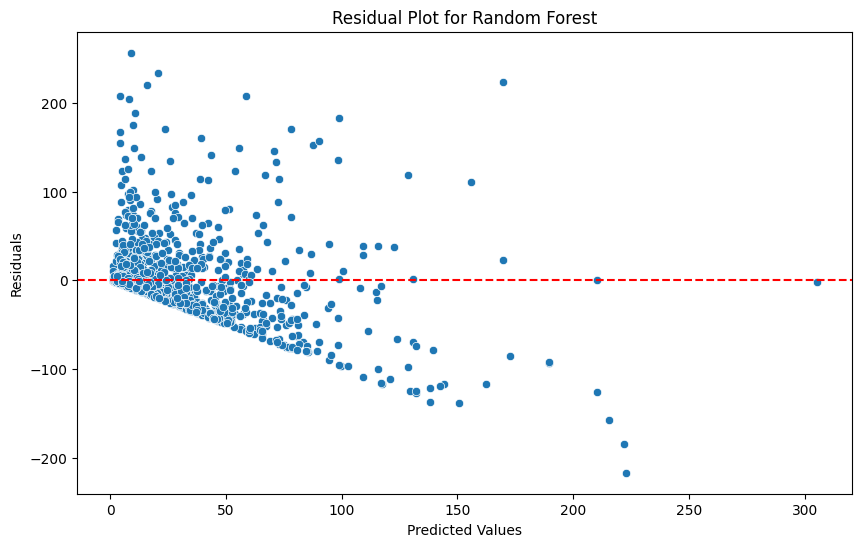

In [88]:
plt.figure(figsize=(10, 6))  # Set figure size
residuals_rf = y_test - y_pred_rf  # Calculate residuals for Random Forest
sns.scatterplot(x=y_pred_rf, y=residuals_rf)  # Scatter plot of predicted values vs. residuals
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 for reference
plt.title('Residual Plot for Random Forest')  # Title
plt.xlabel('Predicted Values')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label
plt.show()  # Show the plot

In [89]:
# Residual Plot for Support Vector Regressor

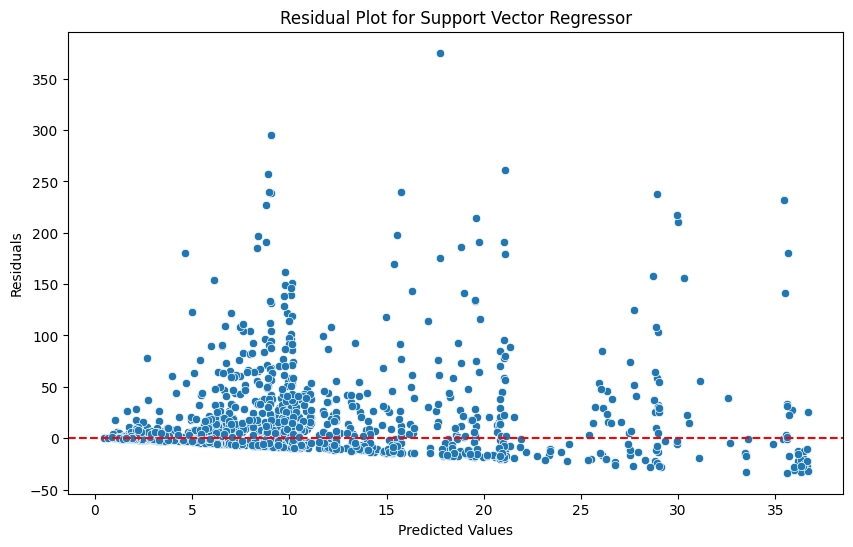

In [90]:
plt.figure(figsize=(10, 6))  # Set figure size
residuals_svr = y_test - y_pred_svr  # Calculate residuals for SVR
sns.scatterplot(x=y_pred_svr, y=residuals_svr)  # Scatter plot of predicted values vs. residuals
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 for reference
plt.title('Residual Plot for Support Vector Regressor')  # Title
plt.xlabel('Predicted Values')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label
plt.show()  # Show the plot

In [91]:
# Actual vs. Predicted Plot for Random Forest

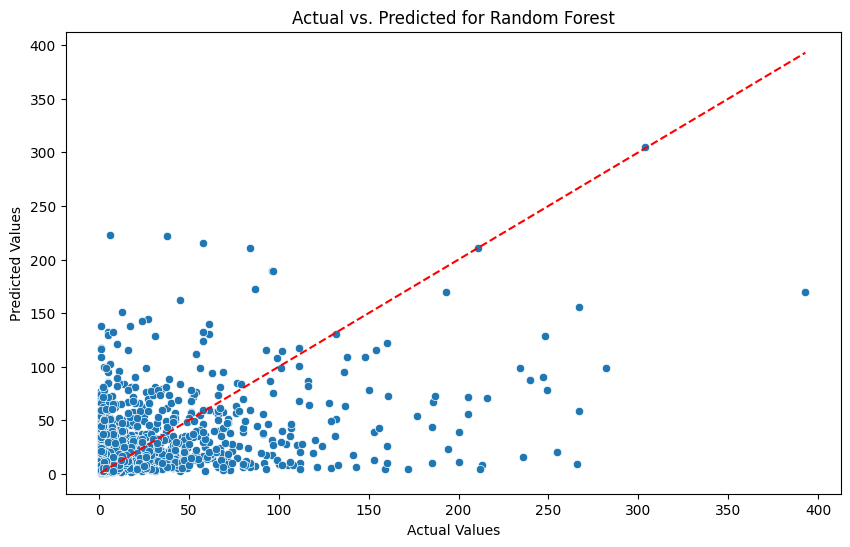

In [92]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x=y_test, y=y_pred_rf)  # Scatter plot of actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted for Random Forest')  # Title
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.show()  # Show the plot

In [93]:
# Actual vs. Predicted Plot for Support Vector Regressor

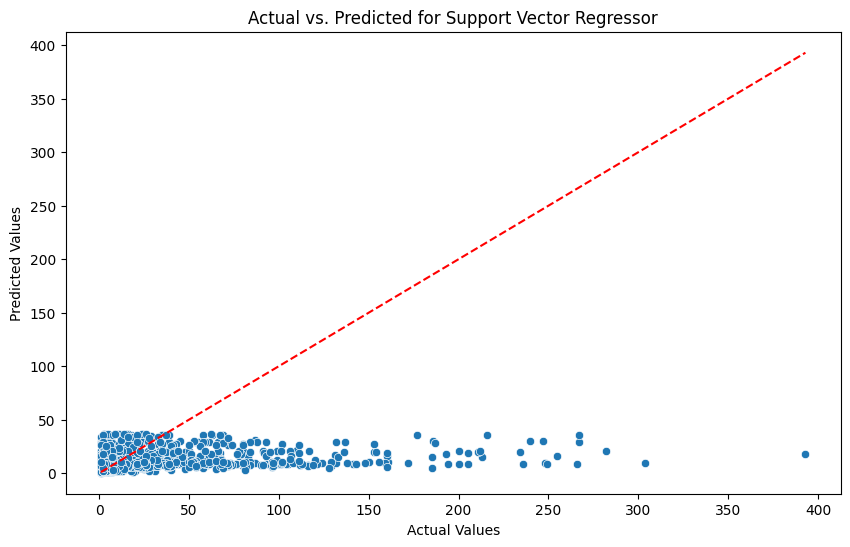

In [94]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x=y_test, y=y_pred_svr)  # Scatter plot of actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted for Support Vector Regressor')  # Title
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.show()  # Show the plot

In [95]:
# Feature Importance Plot for Random Forest

In [96]:
importances = rf.feature_importances_  # Get feature importances from the Random Forest model

In [97]:
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

In [98]:
# Plot the feature importances

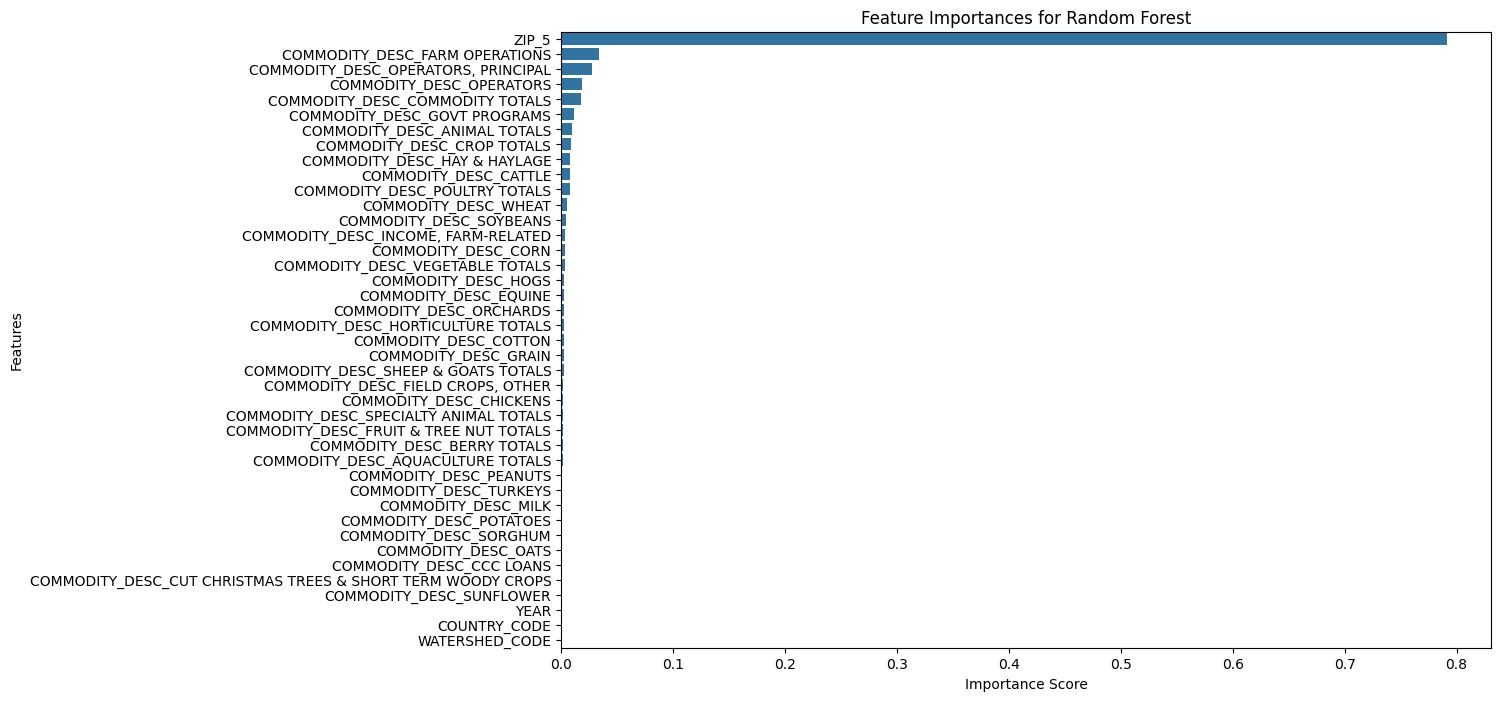

In [99]:
plt.figure(figsize=(12, 8))  # Set figure size
sns.barplot(x=importances[indices], y=X.columns[indices])  # Bar plot for feature importances
plt.title('Feature Importances for Random Forest')  # Title
plt.xlabel('Importance Score')  # X-axis label
plt.ylabel('Features')  # Y-axis label
plt.show()  # Show the plot

In [100]:
# Prediction Distribution Plot

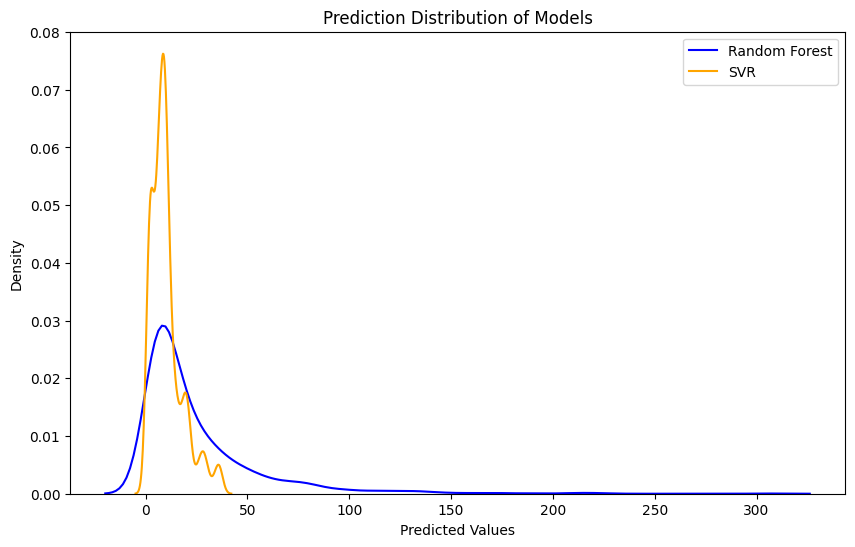

In [101]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(y_pred_rf, label='Random Forest', color='blue')  # KDE for Random Forest predictions
sns.kdeplot(y_pred_svr, label='SVR', color='orange')  # KDE for SVR predictions
plt.title('Prediction Distribution of Models')  # Title
plt.xlabel('Predicted Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Show the plot

---

---

# 🏁 Step 9: Conclusion
Summarize the outcomes and insights gained from the project.

## 📜 Summary:
- Successful implementation of Random Forest and SVR for predictive modeling.
- Key findings and potential areas for improvement identified.

---